In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Heart Disease.csv')

In [3]:
df['AgeCategory'] = df['AgeCategory'].replace(('80 or older'), ('80-0'))
df['AgeCategory']=df['AgeCategory'].str.replace(pat=r'-',repl=' ', regex=False)
df['AgeCategory']=df['AgeCategory'].str.split()
df['Min AgeCategory'] = df['AgeCategory'].apply(lambda x: x[0])
df['AgeCategory'] = df['Min AgeCategory'].astype('int')


In [4]:
df['AgeCategory']

0         55
1         80
2         65
3         75
4         40
          ..
319790    60
319791    35
319792    45
319793    25
319794    80
Name: AgeCategory, Length: 319795, dtype: int64

In [5]:
df = df[~(df['BMI']>42)]

In [6]:
df = df.drop(['Min AgeCategory'], axis = 1)

In [7]:
df = df.drop_duplicates()

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

In [10]:
x = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

In [11]:
x.shape

(290579, 17)

In [12]:
from imblearn.under_sampling import NearMiss
nrms = NearMiss()

In [13]:
X, Y = nrms.fit_resample(x, y)

In [14]:
Y.value_counts()

0    25990
1    25990
Name: HeartDisease, dtype: int64

In [15]:
x.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

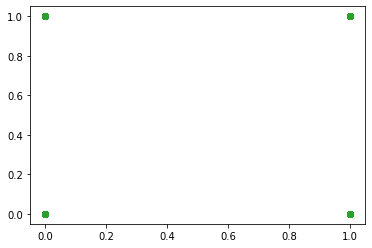

In [16]:
plt.scatter(x.Sex, df.HeartDisease)
plt.scatter(x.AlcoholDrinking, df.KidneyDisease)
plt.scatter(x.Sex, df.HeartDisease)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,train_size=.70, random_state=42)

In [19]:
xtest.shape

(15594, 17)

In [20]:
from sklearn.svm import SVC

In [21]:
svc1 = SVC()

In [22]:
svc1.fit(xtrain, ytrain)

In [23]:
svc1.score(xtest, ytest)

In [24]:
# List of C values
import numpy as np
C_range = np.logspace(-1, 1, 3)


In [25]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
grids = { 
    # Regularization parameter.
    "C": C_range,
    # Kernel type
    "kernel": ['rbf', 'poly', 'sigmoid'],
    }


In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
# Define grid search
rcv = RandomizedSearchCV(svc1, grids, n_iter=3, cv=5)
# Fit grid searc
rcv_result = rcv.fit(xtrain, ytrain)
# Print grid search summary
rcv_result

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=3,
                   param_distributions={'C': array([ 0.1,  1. , 10. ]),
                                        'kernel': ['rbf', 'poly', 'sigmoid']})

In [29]:
rcv_result.best_params_

{'kernel': 'rbf', 'C': 10.0}

In [31]:
svc2 = rcv_result.best_estimator_

In [32]:
svc2.fit(xtrain, ytrain)

SVC(C=10.0)

In [33]:
svc2.score(xtest, ytest)

0.8562267538796973